# Regressão polinomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

## Gerando os dados

In [2]:
samples = 100
X = np.linspace(-3, 3, samples)[:, np.newaxis]
Y = (-0.3 * X**3 + 0.5 * X**2 + X + 2) + np.random.randn(samples, 1)
YY = (-0.3 * X**3 + 0.5 * X**2 + X + 2)

In [9]:
X.shape

(100, 1)

## Plotando os dados

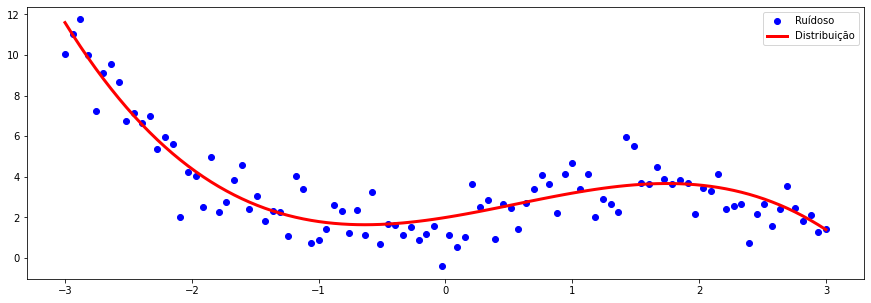

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(X, Y, color="b", label="Ruídoso")
ax.plot(X, YY, color="r", label="Distribuição", linewidth=3)
ax.legend()

- Vamos usar a função `PolynomialFeatures()` fazer com que cada feature multiplique pela potência que desejamos

In [19]:
n_degree = 3
poly_features = PolynomialFeatures(degree=n_degree, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 3)

- Realizando o treinamento

In [20]:
lin_reg = SGDRegressor(alpha=0.01)
lin_reg.fit(X_poly, Y.ravel())
lin_reg.intercept_, lin_reg.coef_

(array([1.63849124]), array([ 0.91991213,  0.54441468, -0.33239311]))

- Refazendo o plot

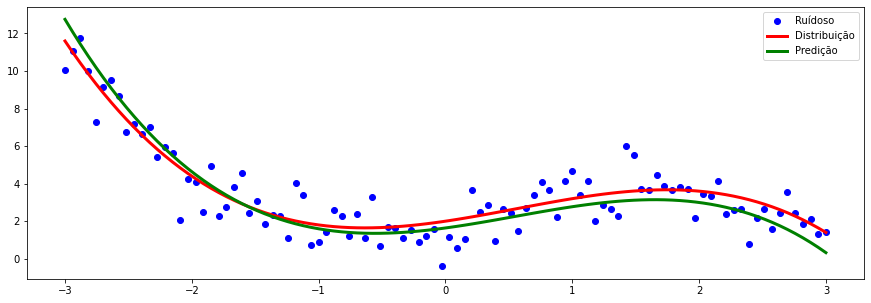

In [21]:
Y_pred = lin_reg.predict(X_poly)
ax.plot(X, Y_pred, color="g", label="Predição", linewidth=3)
ax.legend()
fig

## Plotando diferentes graus de polinomios

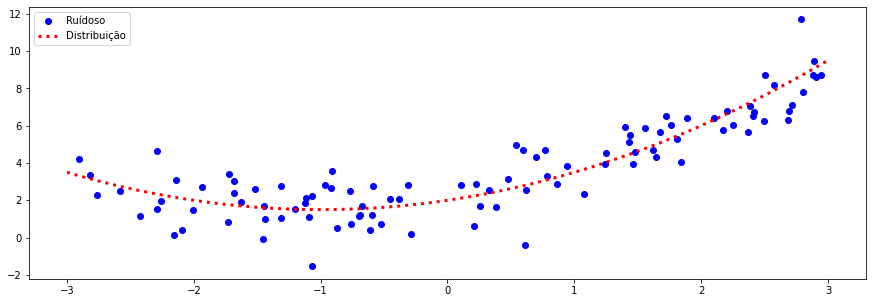

In [29]:
samples = 100
X = 6 * np.random.rand(samples, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(samples, 1)

X_new = np.linspace(-3, 3, samples)[:, np.newaxis]
YY =  0.5 * X_new**2 + X_new + 2

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(X, Y, color="b", label="Ruídoso")
ax.plot(X_new, YY, color="r", label="Distribuição", linewidth=3, linestyle="dotted")
ax.legend()

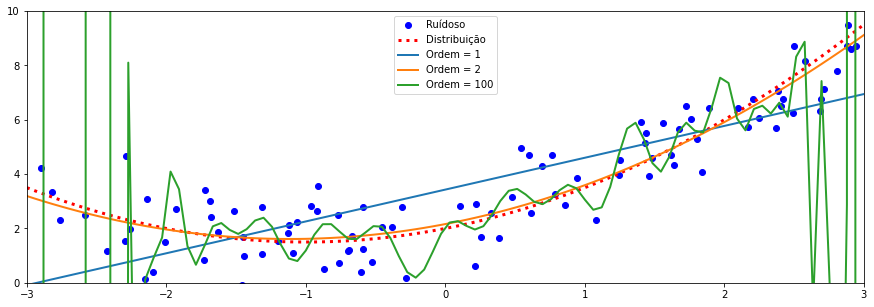

In [30]:
degrees = [1, 2, 100]

for dg in degrees:
    poly_features = PolynomialFeatures(degree=dg, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    poly_reg = Pipeline([
                            ("poly_features", poly_features),
                            ("std_scaler", std_scaler),
                            ("lin_reg", lin_reg),
                        ])
    
    
    poly_reg.fit(X, Y.ravel())
    Y_pred = poly_reg.predict(X_new)
    
    ax.plot(X_new, Y_pred, label=f"Ordem = {dg}", linewidth=2)
    
ax.legend()
ax.set(xlim=(-3, 3), ylim=(0, 10))
fig